In [25]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *
import cv2

from scipy import ndimage, fft
from io import BytesIO

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

In [ ]:
k = 3   # kernel size
beta2s = [1, 0, 0.25, 0.5, 0.75] #[0, 0.25, 0.75, 1]  
activations = [tf.nn.relu]
timestamps = [1,25, 100]
experiment_name = "unipolar_circle"
box_dims = [200, 100]
step =   25 # Plot axis step

In [27]:
tf.nn.relu.__name__

'relu'

In [28]:
3//2

1

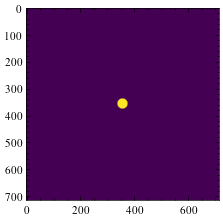

In [29]:
# Single pixel input
d = 715
mid = d//2

img = np.zeros((d,d)) # cv2.imread('input4.png', 0)/255. 


cv2.circle(img,(mid,mid), 19, (255.0), -1)
mid = img.shape[0]//2

plt.imshow(img)

In [30]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
filters = np.zeros((3,3,1,1))
img = tf.cast(tf.repeat(tf.expand_dims([img], axis=-1) , repeats = filters.shape[-2], axis=-1), dtype=tf.float32)

50 -50
39 39
tf.Tensor(0.9999999999999999, shape=(), dtype=float64)
4.0 0.0
26.090633
0.9999988
120.93401
146.99825
164.37839
177.53223
187.93034
196.52583
203.95659
210.46198
216.26044
221.43224
226.09674
230.25824
233.98505
237.31125
240.26836
242.88866
245.1739
247.15488
248.85611
250.29721
251.49933
252.47638
253.25098
253.84094
1.0000005
254.26802
254.5411
254.67924
254.69696
254.61076
254.42848
254.16359
253.82646
253.42795
252.97472
252.47508
251.93655
251.36482
250.76491
250.14172
249.50037
248.84349
248.17468
247.49713
246.81276
246.12392
245.43214
244.73969
244.04744
243.3566
242.66824
241.98306
241.30177
240.62508
239.9532
239.28671
238.62593
237.97104
237.32222
236.67972
236.04353
235.41383
234.79063
234.17395
233.56375
232.95987
232.36267
231.77194
231.18759
230.60957
230.0378
229.47223
228.91273
228.35933
227.81183
227.27023
226.7344
226.2043
225.67978
225.16055
224.64703
224.13885
223.63596
223.13828
222.64565
222.15807
221.67543
221.19771
220.72473
220.25645
219.79285
2

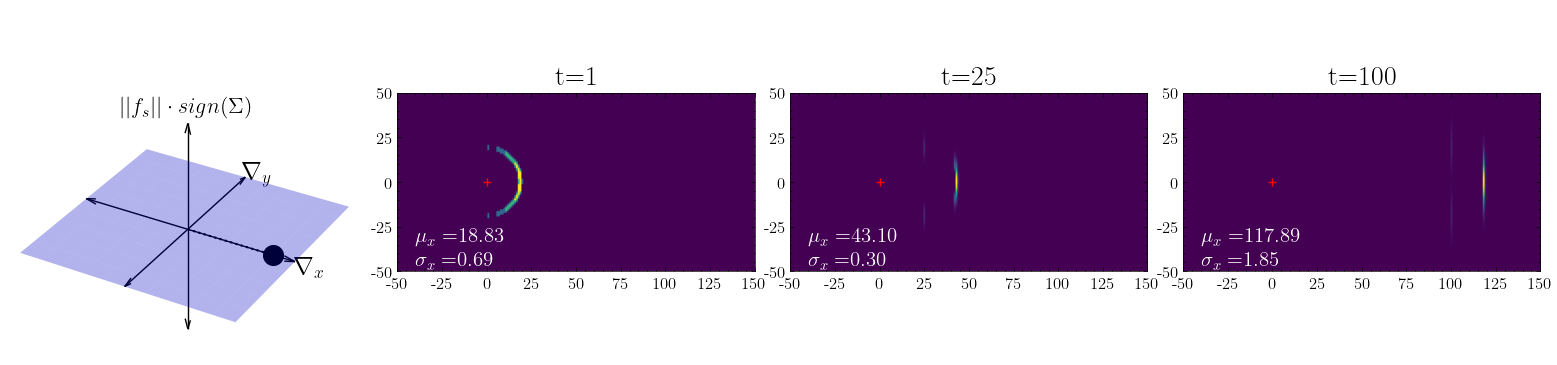

tf.Tensor(1.0, shape=(), dtype=float64)
0.0 4.0
63.908737
1.0000005
65.53793
66.24911
66.80411
67.28193
67.71098
68.10561
68.47407
68.8221
69.1535
69.47085
69.77634
70.0717
70.35814
70.63659
70.90812
71.17335
71.4329
71.68727
71.93691
72.182205
72.4236
72.661156
72.8952
73.125946
1.0000001
73.35367
73.57828
73.79998
74.01895
74.23502
74.44844
74.659004
74.86679
75.07189
75.27405
75.47344
75.66979
75.86326
76.05355
76.24083
76.42491
76.60563
76.783134
76.957115
77.12779
77.294945
77.45842
77.6184
77.77462
77.92727
78.07618
78.221245
78.362625
78.50023
78.63392
78.7639
78.88998
79.01234
79.1309
79.24555
79.35654
79.46376
79.56724
79.6669
79.762985
79.85542
79.94411
80.029335
80.11101
80.18907
80.26378
80.33505
80.40286
80.46744
80.528755
80.58684
80.64161
80.69337
80.74206
80.787605
80.830284
80.870026
80.906815
80.94087
80.97217
81.00076
81.02657
81.04989
81.07065
81.088776
81.10457
81.11796
81.12899
81.1376
81.144066
81.148346
81.15033
81.15032
81.14826
81.144066
0.9999995
81.138


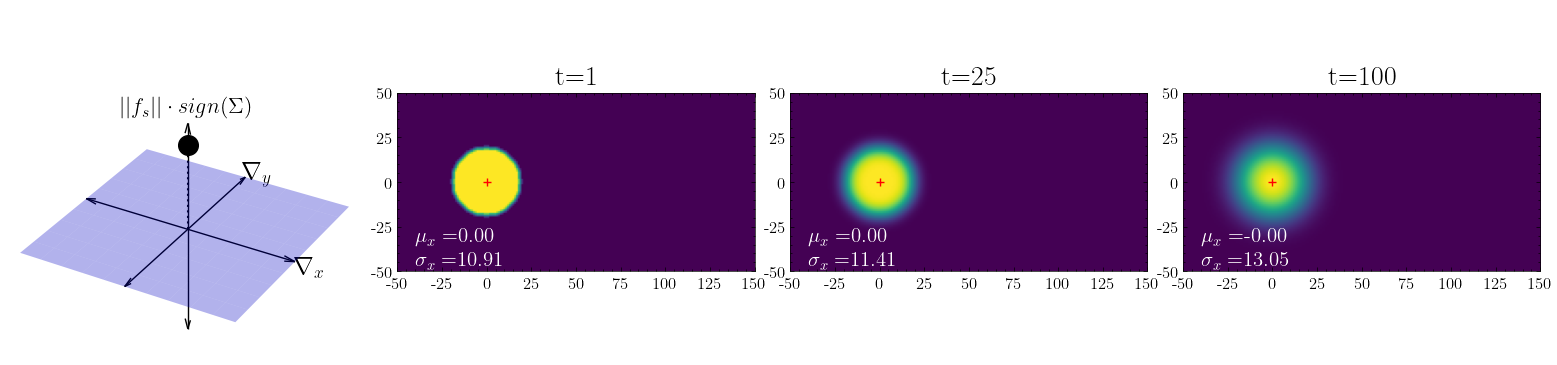

tf.Tensor(1.0, shape=(), dtype=float64)
2.0 3.4641016151377544
55.346584
0.9999996
56.603695
57.170902
57.607555
57.98134
58.315838
58.622753
58.90884
59.17853
59.434925
59.680202
59.916084
60.143738
60.36433
60.57861
60.787285
60.990852
61.189972
61.38489
61.576023
61.763664
61.948097
62.129612
62.308277
62.48443
1.0000004
62.65805
62.829422
62.99853
63.165623
63.3306
63.493725
63.654892
63.814186
63.971676
64.12739
64.28128
64.43331
64.583664
64.732124
64.878944
65.02364
65.16693
65.30775
65.447426
65.58416
65.72034
65.85281
65.985435
66.113396
66.24248
66.36608
66.49129
66.610664
66.73162
66.84681
66.96334
67.07439
67.18626
67.29326
67.40027
67.50333
67.60527
67.704605
67.80123
67.89688
67.98798
68.08023
68.16555
68.25462
68.33393
68.42009
68.49315
68.57673
68.64331
68.72448
68.78676
68.86348
68.92262
68.9938
69.050095
69.115616
69.16941
69.22892
69.28054
69.33388
69.383675
69.43066
69.47901
69.51944
69.5666
69.60024
69.64661
69.673294
69.71921
69.73882
69.784615
69.798836
69.842865

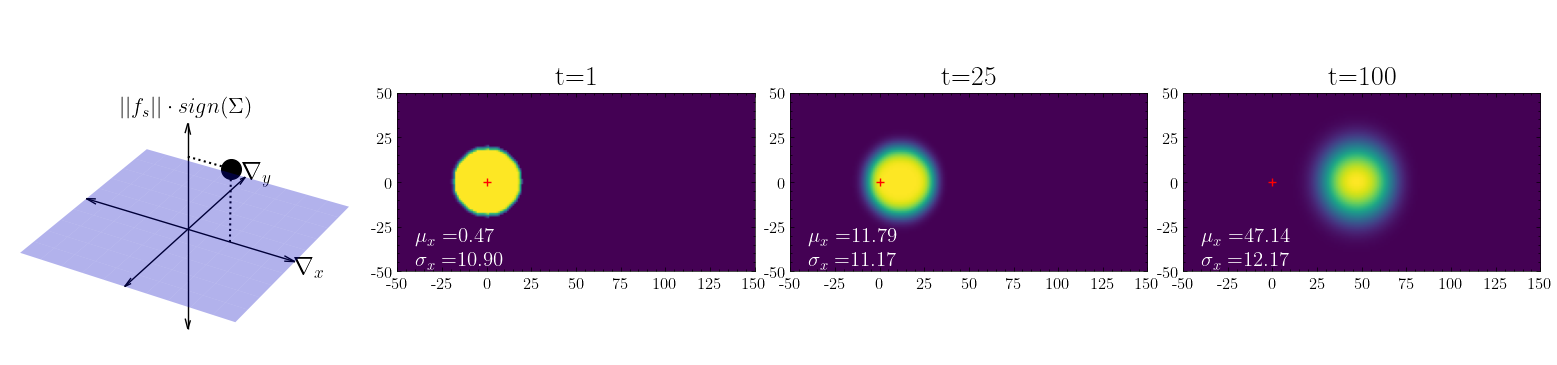

tf.Tensor(1.0, shape=(), dtype=float64)
2.8284271247461903 2.8284271247461903
48.57573
1.0000005
48.00841
49.93673
50.493332
49.93796
50.921608
51.53243
51.578743
51.371544
52.219658
52.64444
52.441956
52.474762
53.159187
53.391087
53.099403
53.232567
53.777046
53.92927
53.63762
53.730972
54.202126
54.334133
54.08528
54.05655
0.99999976
54.493988
54.638348
54.452892
54.257
54.68437
54.858276
54.745186
54.361565
54.792336
55.00401
54.965405
54.655018
54.830853
55.08323
55.11727
54.910984
54.810326
55.102535
55.204895
55.095108
54.757923
55.068237
55.232994
55.21117
54.98617
54.986603
55.20685
55.264023
55.14036
54.86384
55.132114
55.258915
55.225994
55.019188
55.014645
55.201725
55.248837
55.1408
54.866165
55.098618
55.215317
55.194717
55.024242
54.955605
55.131733
55.187744
55.109997
54.88772
55.00478
55.12668
55.130516
55.004395
54.84078
55.018314
55.092922
55.052044
54.885323
54.86964
55.00459
55.03811
54.958992
54.75808
54.872536
54.97001
54.967903
54.85615
54.703693
54.855103
54.91

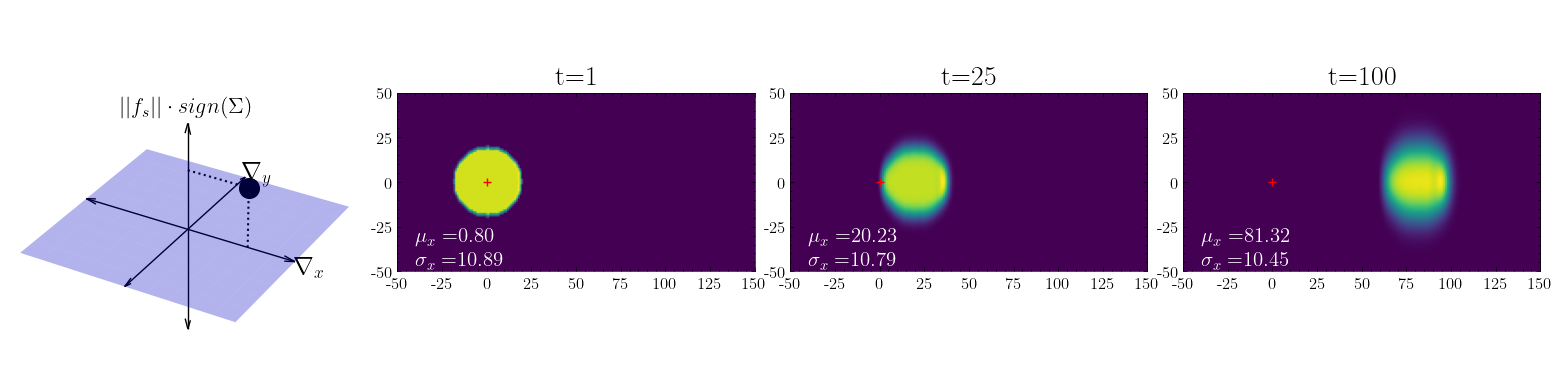

tf.Tensor(1.0, shape=(), dtype=float64)
3.4641016151377544 2.0
43.89806
0.99999934
56.89948
69.24095
82.00407
94.75736
107.86935
120.95394
133.28227
143.06174
159.4976
174.32625
187.45174
198.26782
207.45541
214.87961
219.50488
221.51338
221.20483
219.01433
215.14082
209.82005
203.41045
196.2408
188.58693
183.11688
0.9999999
191.71661
198.84422
204.56502
208.8842
211.73262
213.01642
212.7459
211.05302
208.07715
203.98528
199.01181
193.38725
187.31691
180.97443
174.48285
167.90797
167.59642
173.49269
178.23286
181.82487
184.27853
185.59978
185.79309
184.91528
183.15327
180.6526
177.54453
173.93637
169.89407
165.4322
160.55284
155.31932
152.10596
149.18454
145.40193
143.984
147.16135
149.58206
151.32697
152.44708
152.94275
152.78236
151.9826
152.5076
154.63971
155.4971
155.11366
153.57411
151.0029
147.563
143.42949
138.77034
133.73032
128.42178
130.62761
136.49307
141.31056
145.10275
147.88031
149.62181
150.39238
150.47801
149.88834
148.56012
146.49084
143.71703
140.29823
136.30829
131.8

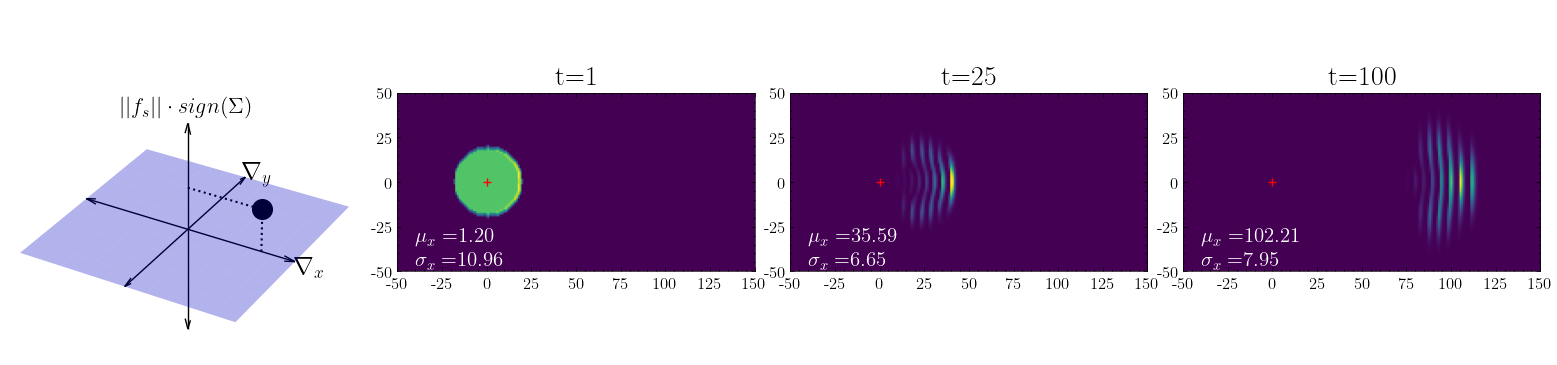

In [32]:
import matplotlib.patches as mpatches



filters = np.zeros((3,3,1,1))



#Get image height and width

vals_x = img[0, img.shape[1]//2, :, :]
vals_y = img[0, :, img.shape[2]//2, :]
nonzeros = np.nonzero(vals_x)[0]
if nonzeros.size > 0:
    length_y = nonzeros[-1] - nonzeros[0] + 1
else:
    length_y = 0  # all zeros
nonzeros = np.nonzero(vals_x)[0]
if nonzeros.size > 0:
    length_x = nonzeros[-1] - nonzeros[0] + 1
else:
    length_x = 0  # all zeros



#step = 2**np.floor(np.log2(( (length_x) + np.max(timestamps) )// 5))


max_x = int(box_dims[0]*(.75))
min_x = -int(box_dims[0]*(.25))

max_y = box_dims[1]//2
min_y = -(box_dims[1]//2)

print(max_y, min_y)
print(length_x, length_y)


for activation in activations:
	for beta2 in beta2s:

		
		images = []

		filters = np.zeros((3,3,1,1))

		t = np.zeros((3,3))
		t[1, 0] = np.sqrt(beta2)
		t[0, 0] = np.sqrt(1-beta2)
		filters = np.reshape(fft.idctn(t, norm='ortho'), (3,3,1,1)) 
		print(tf.math.reduce_euclidean_norm(filters))
		#filters /= tf.math.reduce_euclidean_norm(filters)
		
		w =tf.cast(filters, dtype=tf.float32)# tf.expand_dims(filters, -1), dtype=tf.float32)
		w = tf.transpose(w, perm=(1,0,2,3))


		x = img


		directory = f"figures/{experiment_name}_{activation.__name__}_{k}x{k}_{beta2}"
		if not os.path.exists(directory):
			os.makedirs(directory)




		#Generate Plot
		fig = plt.figure(figsize=(16,len(timestamps)+1))
		gs = fig.add_gridspec(1,len(timestamps)+1, wspace=0.1)

		ax0 = fig.add_subplot(gs[0], projection='3d')
		plot_filter_x(beta2, ax = ax0)
		ax0.axis('off')

		#for i, im in enumerate(images):	
		plot_num = 1
		for i in range(timestamps[-1]+1):
			x = x/np.std(x)
			
			if i in timestamps:

				ax = fig.add_subplot(gs[plot_num])
				plot_num+=1
				print(np.std(x))
				vals = x[0, x.shape[1]//2, :, :]
				vals = vals/np.sum(vals)

				pos = np.expand_dims(np.linspace(-(x.shape[1]//2), x.shape[1]//2, x.shape[1]),-1)
				mean = tf.reduce_sum(pos*vals)
				var = tf.reduce_sum(((pos-mean)**2) * vals)
				std = np.sqrt(var)
				#print(mean, np.sqrt(var))
				
				im = ax.imshow(x[0,:,:,0])
				ax.plot(mid, mid, marker = '+', color='red')

				'''arr =  mpatches.FancyArrowPatch((mid, mid), (mid+mean+std, mid),
										mutation_scale=4, shrinkA=0, shrinkB=0,zorder=10, color="red")
				ax.add_patch(arr)'''


				ax.annotate(r'$\sigma_x=$'+f"{std:.2f}", (0.05,0.01), ha='left', va='bottom',color='white', xycoords='axes fraction', fontsize=15)
				ax.annotate(r'$\mu_x=$'+f"{mean:.2f}", (0.05,0.14), ha='left', va='bottom',color='white', xycoords='axes fraction', fontsize=15)
				#ax.annotate(r'$argmax_x=$'+f"{np.argmax(vals)-mid:.2f}", (0.05,.17), ha='left', va='bottom',color='white', xycoords='axes fraction')
				
				#ax.annotate(r'$\sigma=$'+f"{std:.2f}", (.5, 6), xycoords=arr, ha='center', va='bottom',color='white')
				#ax.arrow(, 112, dx=, dy= 0, color='black')




				ax.set(xlim=((mid + min_x, mid+max_x)) , ylim=((mid+min_y, (mid+max_y))))

				# Re-label ticks relative to midpoint
				xticks = ax.get_xticks()
				yticks = ax.get_yticks()

				#ax.set_xticklabels(np.arange(min_x, max_x+1, step=2))
				#ax.set_yticklabels(np.arange(min_y, max_y+1, step=2))
				xticks = np.arange(np.sign(min_x) * (np.abs(min_x)//2)*2, step+(max_x//2)*2, step=step) + mid
				yticks = np.arange(np.sign(min_y) * (np.abs(min_y)//2)*2, step+(max_y//2)*2, step=step) + mid
				ax.set_xticks(xticks)
				ax.set_yticks(yticks)
				ax.tick_params(axis='x', labelsize=12)
				ax.tick_params(axis='y', labelsize=12)


				ax.set_xticklabels([x - mid for x in xticks])
				ax.set_yticklabels([y - mid for y in yticks])



				#ax.set_xticks(np.linspace(-round(std)-1, round(std)+1, int(0.5*(std)+3)))
				#fig.colorbar(im, orientation='vertical')

				'''plt.close(fig) 
				buf = BytesIO()
				fig.savefig(buf, format="svg", dpi=fig.dpi, bbox_inches="tight")
				buf.seek(0)'''



				#ax0.imshow(im)
				#ax.axis('off')
				ax.set_title(f"t={i}", fontsize=20)


				#images.append(Image.open(buf))
				#print(x)

			x = activation( tf.nn.conv2d(x, w , strides=(1,1), 
									padding='SAME') )
			print(np.max(x))


		fig.subplots_adjust(left=0.02, right=0.98, top=0.9, bottom=0.01, wspace=0.1)
		fig.savefig(f"{experiment_name}_{k}x{k}__{activation.__name__}_{beta2}.pdf", format="pdf", dpi=fig.dpi, bbox_inches="tight")
		plt.show()


In [33]:
xticks-mid

array([-50, -25,   0,  25,  50,  75, 100, 125, 150])

In [34]:
mid

357

In [35]:
yticks#-mid

array([307, 332, 357, 382, 407])

In [36]:
step

25